In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, multilabel_confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from ucimlrepo import fetch_ucirepo 

## Explicación del Proceso de Preparación y División del Conjunto de Datos del Cáncer de Mama de Wisconsin

### Objetivo
El proceso descrito se centra en la preparación y división del conjunto de datos del cáncer de mama de Wisconsin para su análisis y modelado.

### Descripción del Proceso

1. **Carga del Conjunto de Datos**: 
   - Se accede y carga el conjunto de datos del cáncer de mama de Wisconsin desde un repositorio en línea, específicamente de UCI (Universidad de California, Irvine).

2. **Extracción de Características y Etiquetas**: 
   - Las características (`X`) y las etiquetas objetivo (`y`) se extraen del conjunto de datos. Las características incluyen diversos indicadores médicos, mientras que las etiquetas representan la presencia o ausencia de cáncer.

3. **Transformación de Etiquetas**: 
   - Las etiquetas, que originalmente indican la presencia de cáncer con el número 4, se transforman a 1, y todas las demás etiquetas (indicando ausencia de cáncer) se transforman a 0. Esto simplifica el análisis convirtiéndolo en un problema de clasificación binaria.

4. **Creación y Limpieza de un DataFrame de pandas**: 
   - Se crea un DataFrame usando las características y las etiquetas transformadas.
   - Se eliminan las filas que contienen valores faltantes (NaN) para mantener la integridad y la calidad de los datos.

5. **Preparación de Datos para el Modelado**: 
   - Las características y etiquetas se separan nuevamente, quedando listas para ser usadas en la formación y evaluación de modelos de aprendizaje automático.

6. **División en Conjuntos de Entrenamiento y Prueba**: 
   - Los datos se dividen en conjuntos de entrenamiento y prueba. Una proporción común es reservar el 20% de los datos para pruebas, lo que permite evaluar la eficacia del modelo en datos no vistos.

### Conclusión
Este proceso meticuloso garantiza que el conjunto de datos del cáncer de mama esté bien preparado y libre de inconsistencias, lo que es fundamental para desarrollar modelos precisos y confiables en el campo de la detección y diagnóstico del cáncer.

In [218]:
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets
y = np.where(y == 4, 1, 0)
y = y.astype(int)
y = y.flatten()

data_breast_cancer = pd.DataFrame(X, columns=breast_cancer_wisconsin_original.data.feature_names)
data_breast_cancer['label'] = y

nan_rows = np.isnan(data_breast_cancer).any(axis=1)
data_breast_cancer = data_breast_cancer[~nan_rows]
X_breast_cancer = data_breast_cancer.drop(columns=['label']).values
y_breast_cancer = data_breast_cancer['label'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_breast_cancer, X_test_breast_cancer, y_train_breast_cancer, y_test_breast_cancer = train_test_split(X_breast_cancer, y_breast_cancer, test_size=0.2, random_state=42, stratify=y_breast_cancer)

## Explicación del Proceso de Preparación y División de Datos del Conjunto de Datos de Frijoles Secos

### Objetivo
El proceso descrito se enfoca en la preparación y división del conjunto de datos de frijoles secos para su posterior análisis y modelado.

### Pasos del Proceso

1. **Carga del Conjunto de Datos**: 
   - Se obtiene el conjunto de datos de frijoles secos desde un repositorio en línea, específicamente el repositorio UCI.

2. **Extracción de Características y Etiquetas**: 
   - Las características (`X`) y etiquetas objetivo (`y`) se extraen del conjunto de datos cargado.

3. **Transformación de Etiquetas de Texto a Numéricas**: 
   - Las etiquetas de clase, originalmente en formato de texto (como 'SEKER', 'BARBUNYA', etc.), se convierten en valores numéricos para facilitar su manejo en análisis posteriores. Cada tipo de frijol recibe un número entero único.

4. **Conversión de Tipo de Dato de Etiquetas**: 
   - Las etiquetas convertidas se transforman explícitamente a tipo de dato entero para asegurar la coherencia y compatibilidad con algoritmos de aprendizaje automático.

5. **Creación de un DataFrame de pandas**: 
   - Se crea un DataFrame utilizando las características y las etiquetas numéricas. Este DataFrame facilita la manipulación y análisis de los datos.

6. **Limpieza de Datos**: 
   - Se eliminan las filas con valores faltantes (NaN) para asegurar la integridad de los datos.

7. **Separación en Características y Etiquetas**: 
   - Las características y etiquetas se separan nuevamente en preparación para el entrenamiento del modelo.

8. **División en Conjuntos de Entrenamiento y Prueba**: 
   - Finalmente, los datos se dividen en conjuntos de entrenamiento y prueba utilizando una proporción estándar (usualmente el 20% de los datos se reserva para pruebas).

### Conclusión
Este proceso resulta en un conjunto de datos limpio y bien estructurado, listo para ser utilizado en tareas de clasificación o análisis de datos. La transformación y limpieza de datos son pasos esenciales para garantizar la eficacia y precisión de los modelos de aprendizaje automático que se apliquen posteriormente.


In [219]:
dry_bean_dataset = fetch_ucirepo(id=602) 
  
X = dry_bean_dataset.data.features 
y = dry_bean_dataset.data.targets 
y = np.where(y == 'SEKER', 0, y)
y = np.where(y == 'BARBUNYA', 1, y)
y = np.where(y == 'BOMBAY', 2, y)
y = np.where(y == 'CALI', 3, y)
y = np.where(y == 'HOROZ', 4, y)
y = np.where(y == 'SIRA', 5, y)
y = np.where(y == 'DERMASON', 6, y)
# Cambiar el tipo de dato de las etiquetas a entero
y = y.astype(int)
y = y.flatten()

data_dry_bean = pd.DataFrame(X, columns=dry_bean_dataset.data.feature_names)
data_dry_bean['label'] = y
data_dry_bean = data_dry_bean.dropna()
X_dry_bean = data_dry_bean.drop(columns=['label']).values
y_dry_bean = data_dry_bean['label'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_dry_bean, X_test_dry_bean, y_train_dry_bean, y_test_dry_bean = train_test_split(X_dry_bean, y_dry_bean, test_size=0.2, random_state=42, stratify=y_dry_bean)

## Explicación del Proceso de Preparación y División del Conjunto de Datos de Arroz 'Cammeo' y 'Osmancik'

### Objetivo
Este proceso detalla los pasos para preparar y dividir un conjunto de datos de variedades de arroz, específicamente 'Cammeo' y 'Osmancik', para su análisis y modelado.

### Descripción del Proceso

1. **Carga del Conjunto de Datos**: 
   - Se accede y carga el conjunto de datos de arroz 'Cammeo' y 'Osmancik' desde el repositorio en línea de UCI.

2. **Extracción de Características y Etiquetas**: 
   - Se extraen las características (`X`) y las etiquetas objetivo (`y`) del conjunto de datos. Las características incluyen aspectos físicos y químicos del arroz.

3. **Transformación de Etiquetas de Texto a Numéricas**: 
   - Las etiquetas originales, que son nombres de variedades de arroz, se transforman en valores numéricos para su procesamiento. 'Cammeo' se convierte en 0 y 'Osmancik' en 1.

4. **Conversión de Tipo de Dato de Etiquetas**: 
   - Las etiquetas transformadas se convierten a tipo entero para garantizar la uniformidad en el análisis y en los algoritmos de aprendizaje automático.

5. **Creación y Limpieza de un DataFrame de pandas**: 
   - Se crea un DataFrame con las características y etiquetas numéricas.
   - Se eliminan las filas con valores faltantes (NaN) para asegurar la integridad de los datos.

6. **Preparación de Datos para Modelado**: 
   - Se separan las características y las etiquetas para su uso en entrenamiento y pruebas de modelos de aprendizaje automático.

7. **División en Conjuntos de Entrenamiento y Prueba**: 
   - Los datos se dividen en conjuntos de entrenamiento y prueba, típicamente reservando un 20% para pruebas. Esta división permite evaluar la efectividad del modelo en datos no vistos previamente.

### Conclusión
Este proceso metodológico asegura que el conjunto de datos de arroz 'Cammeo' y 'Osmancik' esté preparado adecuadamente, libre de datos faltantes y con etiquetas claramente definidas, facilitando su uso en aplicaciones de aprendizaje automático para clasificación o análisis detallado.


In [220]:
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets  
labels = np.unique(y)
y = np.where(y == 'Cammeo', 0, y)
y = np.where(y == 'Osmancik', 1, y)

# Cambiar el tipo de dato de las etiquetas a entero
y = y.astype(int)
y = y.flatten()

data_rice = pd.DataFrame(X, columns=rice_cammeo_and_osmancik.data.feature_names)
data_rice['label'] = y

# Eliminar filas con valores nulos
data_rice = data_rice.dropna()
X_rice = data_rice.drop(columns=['label']).values

# Inicialización del escalador MinMax
scaler = MinMaxScaler()

# Ajustar el escalador a las características y transformarlas
X_rice = scaler.fit_transform(X_rice)

y_rice = data_rice['label'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_rice, X_test_rice, y_train_rice, y_test_rice = train_test_split(X_rice, y_rice, test_size=0.2, random_state=42, stratify=y_rice)

## Clasificador Basado en Estimador de Densidad por Kernels

### Descripción General
El clasificador utiliza un enfoque basado en el estimador de densidad kernel para determinar la probabilidad de que un conjunto de datos pertenezca a una clase en particular. Este método es útil en situaciones donde las distribuciones de clase son continuas y pueden ser aproximadas por densidades suaves.

### Implementación
La implementación consta de dos componentes principales:
- **Función `kernel_density_estimator`**: Calcula la estimación de densidad kernel para un conjunto de puntos utilizando un conjunto de datos de referencia y un parámetro de ancho de banda.
- **Clase `KernelDensityClassifier`**: Inicializa el clasificador con un ancho de banda especificado, aprende las densidades de cada clase en los datos de entrenamiento, y luego utiliza estas densidades para predecir las clases de nuevas observaciones.

### Uso del Clasificador
Para usar el clasificador, se debe primero entrenarlo con un conjunto de datos etiquetados y luego utilizarlo para hacer predicciones sobre nuevos datos. El entrenamiento se realiza mediante el método `fit`, y las predicciones se generan con el método `predict`.

### Consideraciones
- La elección del `bandwidth` es crucial para el rendimiento del clasificador.
- Es adecuado para datos con distribuciones suaves y continuas.
- Es importante asegurar que los datos estén correctamente formateados y preprocesados.

In [204]:
# Estimador de densidad kernel
def kernel_density_estimator(x, data, bandwidth):
    """
    Calcula la estimación de densidad kernel para un conjunto de puntos.

    Args:
    x (array-like): Punto o conjunto de puntos para los cuales se calcula la estimación de densidad.
    data (array-like): Conjunto de datos de referencia utilizado para la estimación de densidad.
    bandwidth (float): Ancho de banda del kernel, controla la suavidad de la estimación de densidad.

    Returns:
    array-like: Estimación de densidad para cada punto en `x`.
    """
    n = len(data)  # Número de puntos en el conjunto de datos de referencia
    # Calcula la densidad para cada punto en 'x' utilizando un kernel Gaussiano
    densities = np.sum(np.exp(-0.5 * ((x - data) / bandwidth)**2) / (np.sqrt(2 * np.pi) * bandwidth), axis=1)
    return densities / n  # Normaliza la densidad por el número de puntos en 'data'

# Clasificador basado en estimador de densidad kernel ajustado
class KernelDensityClassifier:
    def __init__(self, bandwidth=1.0):
        """
        Inicializa el clasificador basado en estimador de densidad kernel.

        Args:
        bandwidth (float): Ancho de banda para el estimador de densidad kernel.
        """
        self.bandwidth = bandwidth  # Ancho de banda para el kernel
        self.classes_ = None  # Almacenará las clases únicas en los datos
        self.densities_ = None  # Almacenará las densidades por clase

    def fit(self, X, y):
        """
        Entrena el clasificador utilizando los datos proporcionados.

        Args:
        X (array-like): Datos de entrenamiento, donde cada fila es una observación.
        y (array-like): Etiquetas de clase para cada observación en X.
        """
        self.classes_ = np.unique(y)  # Encuentra las clases únicas
        self.densities_ = [None] * len(self.classes_)  # Inicializa la lista de densidades
        for i, cls in enumerate(self.classes_):  # Para cada clase...
            self.densities_[i] = X[y == cls]  # ...almacena los datos correspondientes a esa clase

    def predict(self, X):
        """
        Predice las etiquetas de clase para las observaciones dadas.

        Args:
        X (array-like): Datos de prueba, donde cada fila es una observación.

        Returns:
        np.ndarray: Etiquetas de clase predichas para cada observación en X.
        """
        probs = np.zeros((X.shape[0], len(self.classes_)))  # Inicializa matriz de probabilidades
        for i, class_data in enumerate(self.densities_):  # Para cada conjunto de datos de clase...
            for j, x in enumerate(X):  # ...y para cada punto en 'X'...
                # ...calcula la suma de las densidades kernel para ese punto y esa clase
                probs[j, i] = kernel_density_estimator(x, class_data, self.bandwidth).sum()
        class_indices = np.argmax(probs, axis=1)  # Encuentra la clase con la mayor probabilidad
        return self.classes_[class_indices]  # Devuelve las clases predichas
    
    # Método para obtener los parámetros del clasificador
    def get_params(self, deep=True):
        return {"bandwidth": self.bandwidth}

    # Método para establecer los parámetros del clasificador
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

## Clasificador CART (Árboles de Clasificación y Regresión)

### Descripción General
El clasificador CART es una técnica de aprendizaje supervisado utilizada para construir árboles de decisión, que modelan decisiones y sus posibles consecuencias como un árbol. Esta metodología es efectiva tanto para la clasificación como para la regresión y es útil para problemas donde las relaciones entre los parámetros no son lineales o son desconocidas.

### Implementación
La implementación de CART en Python se realiza a través de una clase que envuelve el estimador de árbol de decisión. Consta de:
- Una inicialización que configura el árbol con parámetros como el ancho de banda para la poda.
- Un método de entrenamiento que adapta el árbol a los datos proporcionados.
- Un método de predicción que utiliza el árbol entrenado para realizar predicciones sobre nuevos conjuntos de datos.

### Uso del Clasificador
Para utilizar el clasificador CART, se prepara un conjunto de datos con características y etiquetas, se entrena el modelo con estos datos y luego se usan los métodos implementados para hacer predicciones. Es crucial realizar un preprocesamiento adecuado de los datos y seleccionar el parámetro de complejidad adecuado para optimizar el rendimiento.

### Consideraciones
- Es importante elegir correctamente el parámetro de complejidad para evitar sobreajustes o subajustes.
- El clasificador CART es adecuado para interpretar modelos y para manejar datos categóricos y continuos.

In [263]:
class CARTClassifier:
    def __init__(self, **kwargs):
        """
        Inicializa el clasificador CART.
        
        Parameters:
        complexity_parameter (float): Parámetro de complejidad (alpha) para la poda de costo-complejidad.
                                      Un valor más alto de alpha resultará en más nodos siendo podados.
        """
        self.tree = DecisionTreeClassifier(**kwargs)

    def fit(self, X, y):
        """
        Entrena el clasificador CART usando los datos de entrenamiento.
        
        Parameters:
        X (array-like): Matriz de características de entrenamiento.
        y (array-like): Vector de etiquetas objetivo.
        """
        self.tree.fit(X, y)

    def predict(self, X):
        """
        Realiza predicciones utilizando el árbol de decisión entrenado.
        
        Parameters:
        X (array-like): Matriz de características de los datos a predecir.
        
        Returns:
        array-like: Vector de predicciones para cada observación en X.
        """
        return self.tree.predict(X)

    def get_params(self, deep=True):
        """
        Obtiene los parámetros del clasificador.
        
        Parameters:
        deep (bool): Si es True, retornará los parámetros de este estimador y los contenidos en `self.tree`.
        
        Returns:
        dict: Un diccionario de los parámetros del clasificador.
        """
        return self.tree.get_params(deep=deep)

    def set_params(self, **params):
        """
        Establece los parámetros del clasificador.
        
        Parameters:
        params (dict): Un diccionario de parámetros a establecer.
        """
        self.tree.set_params(**params)

## Clasificador de Bosques Aleatorios

### Descripción General
Los Bosques Aleatorios son un método de ensamblaje que construye múltiples árboles de decisión y los combina para obtener una predicción más precisa y robusta. Este método es efectivo para lidiar con sobreajustes y proporciona una mejor generalización.

### Implementación
El clasificador de Bosques Aleatorios se implementa utilizando una clase que maneja un conjunto de árboles de decisión. Esta implementación incluye:
- Configuración del número de árboles, la cantidad de variables a considerar en cada división y si se debe utilizar el remuestreo bootstrap.
- Un método de entrenamiento para construir el bosque a partir del conjunto de datos de entrenamiento.
- Un método de predicción para estimar la clase de observaciones no vistas basándose en la votación mayoritaria de los árboles.

### Uso del Clasificador
El clasificador de Bosques Aleatorios se utiliza entrenando primero el modelo con datos etiquetados y luego aplicándolo a nuevos datos para realizar predicciones. La validación cruzada y la búsqueda de parámetros óptimos son prácticas recomendadas para lograr un rendimiento óptimo.

### Consideraciones
- La selección de hiperparámetros como la cantidad de árboles y la profundidad máxima es crucial para el rendimiento del modelo.
- Los Bosques Aleatorios son eficaces para problemas de clasificación multiclase y para conjuntos de datos con un gran número de características.

In [206]:
class RandomForestClassifierWrapper:
    def __init__(self, n_estimators=100, max_features='auto', bootstrap=True, sample_size=None):
        """
        Inicializa el clasificador de Bosques Aleatorios.
        
        Parameters:
        n_estimators (int): Número de árboles en el bosque.
        max_features (int, float, string or None): La cantidad de variables a considerar para la mejor división.
                                                    Si es int, es el número de variables; si es float, es la fracción;
                                                    y 'auto' usa sqrt(n_features).
        bootstrap (bool): Si se usan muestras bootstrap para construir árboles.
        sample_size (int or None): El tamaño de la muestra de remuestreo. Si es None, utiliza el tamaño completo.
        """
        self.classifier = RandomForestClassifier(n_estimators=n_estimators,
                                                 max_features=max_features,
                                                 bootstrap=bootstrap,
                                                 max_samples=sample_size)

    def fit(self, X, y):
        """
        Entrena el clasificador de Bosques Aleatorios usando los datos de entrenamiento.
        
        Parameters:
        X (array-like): Matriz de características de entrenamiento.
        y (array-like): Vector de etiquetas objetivo.
        """
        self.classifier.fit(X, y)

    def predict(self, X):
        """
        Realiza predicciones con el clasificador de Bosques Aleatorios entrenado.
        
        Parameters:
        X (array-like): Matriz de características para hacer predicciones.
        
        Returns:
        array-like: Vector de predicciones para cada observación.
        """
        return self.classifier.predict(X)

    def get_params(self, deep=True):
        """
        Obtiene los parámetros del clasificador para su uso en grid search y otros métodos.
        
        Parameters:
        deep (bool): Si es True, retorna los parámetros del clasificador y de sus subcomponentes.
        
        Returns:
        dict: Diccionario de parámetros del clasificador.
        """
        return self.classifier.get_params(deep=deep)

    def set_params(self, **params):
        """
        Establece los parámetros del clasificador de Bosques Aleatorios.
        
        Parameters:
        params (dict): Diccionario de parámetros a establecer.
        """
        self.classifier.set_params(**params)

### Entrenamiento del Clasificador y selección de Parámetros con Validación Cruzada

### Objetivo
El fragmento de código describe un proceso para seleccionar de manera óptima los parámetros de un clasificador basado en el estimador de densidad kernel, utilizando la técnica de validación cruzada.

### Procedimiento
1. **Definición de Parámetros a Probar**: Se especifica un conjunto de valores posibles para el parámetro 'bandwidth' del clasificador. Estos valores varían en un rango predefinido y son los candidatos para ser evaluados.

2. **Uso de GridSearchCV para la Optimización de Parámetros**: 
   - Se emplea GridSearchCV, una herramienta que automatiza el proceso de ajuste de parámetros, para evaluar todas las combinaciones posibles de los valores de 'bandwidth'.
   - Se utiliza una validación cruzada de 5 pliegues (cv=5), lo que significa que los datos se dividen en 5 conjuntos, y el modelo se entrena y valida 5 veces, cada vez con un conjunto diferente como prueba y el resto como entrenamiento.

3. **Evaluación Basada en la Métrica F1**: La selección se realiza buscando maximizar la puntuación F1, que es una medida que combina la precisión y el recall.

4. **Medición del Tiempo de Ejecución**: Se registra el tiempo que toma realizar todo el proceso de ajuste de parámetros.

5. **Resultados**:
   - Al finalizar, se obtiene el mejor valor de 'bandwidth' (aquel que maximiza la puntuación F1 en la validación cruzada).
   - Se muestra la mejor puntuación F1 alcanzada y el tiempo total de ejecución.

### Conclusión
Este enfoque permite identificar el mejor parámetro 'bandwidth' para el clasificador, garantizando una selección objetiva y basada en el rendimiento del modelo en diferentes subconjuntos de datos. Además, proporciona información valiosa sobre la complejidad computacional del proceso de selección de parámetros.



## Pruebas con KDE

### Para el conjunto de datos de cáncer de mama de Wisconsin

In [260]:
# Definición de los parámetros a probar
param_grid = {'bandwidth': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 4.5, 5.0]}

# Inicialización de GridSearchCV con validación cruzada de 5 particiones (20% de los datos para prueba)
grid_search = GridSearchCV(KernelDensityClassifier(), param_grid, cv=5, scoring='f1')

# Medición del tiempo de "preparación" y ajuste de parámetros
start_time = time.time()
grid_search.fit(X_train_breast_cancer, y_train_breast_cancer)
end_time = time.time()

# Tiempo total utilizado en el proceso
total_time = end_time - start_time

# Resultados de GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [222]:
print("Mejores parámetros (Breast Cancer - KDE):", best_params)
print("Mejor puntuación F1 (Breast Cancer - KDE):", best_score)
print("Tiempo total de preparación y ajuste de parámetros (Breast Cancer - KDE):", total_time)

Mejores parámetros (Breast Cancer - KDE): {'bandwidth': 4.0}
Mejor puntuación F1 (Breast Cancer - KDE): 0.9187134374634376
Tiempo total de preparación y ajuste de parámetros (Breast Cancer - KDE): 0.6854674816131592


In [225]:
# Obtener el mejor clasificador
best_clf_kde_breast = grid_search.best_estimator_

# Entrenar el mejor clasificador
best_clf_kde_breast.fit(X_train_breast_cancer, y_train_breast_cancer)

# Predecir las etiquetas de clase para los datos de prueba
y_pred_kde_breast = best_clf_kde_breast.predict(X_test_breast_cancer)

In [226]:
breast_cancer_results_kde = {}
breast_cancer_results_kde['accuracy'] = accuracy_score(y_test_breast_cancer, y_pred_kde_breast)
breast_cancer_results_kde['f1'] = f1_score(y_test_breast_cancer, y_pred_kde_breast)
breast_cancer_results_kde['recall'] = recall_score(y_test_breast_cancer, y_pred_kde_breast)
breast_cancer_results_kde['precision'] = precision_score(y_test_breast_cancer, y_pred_kde_breast)
breast_cancer_results_kde["time"] = total_time
breast_cancer_results_kde["best_params"] = f"h = {best_params}"
breast_cancer_results_kde["confusion_matrix"] = confusion_matrix(y_test_breast_cancer, y_pred_kde_breast)

### Para el dataset del arroz

In [237]:
# Definición de los parámetros a probar
param_grid = {'bandwidth': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 4.5, 5.0]}

# Inicialización de GridSearchCV con validación cruzada de 5 particiones (20% de los datos para prueba)
grid_search = GridSearchCV(KernelDensityClassifier(), param_grid, cv=5, scoring='f1')

# Medición del tiempo de "preparación" y ajuste de parámetros
start_time = time.time()
grid_search.fit(X_train_rice, y_train_rice)
end_time = time.time()

# Tiempo total utilizado en el proceso
total_time = end_time - start_time

# Resultados de GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [238]:
# Obtener el mejor clasificador
best_clf_kde_rice = grid_search.best_estimator_

# Entrenar el mejor clasificador
best_clf_kde_rice.fit(X_train_rice, y_train_rice)

# Predecir las etiquetas de clase para los datos de prueba
y_pred_kde_rice = best_clf_kde_rice.predict(X_test_rice)

In [239]:
rice_results_kde = {}
rice_results_kde['accuracy'] = accuracy_score(y_test_rice, y_pred_kde_rice)
rice_results_kde['f1'] = f1_score(y_test_rice, y_pred_kde_rice)
rice_results_kde['recall'] = recall_score(y_test_rice, y_pred_kde_rice)
rice_results_kde['precision'] = precision_score(y_test_rice, y_pred_kde_rice)
rice_results_kde["time"] = total_time
rice_results_kde["best_params"] = f"h = {best_params}"
rice_results_kde["confusion_matrix"] = confusion_matrix(y_test_rice, y_pred_kde_rice)

### Para el dataset de frijoles

In [241]:
# Definición de los parámetros a probar
param_grid = {'bandwidth': [1.0, 2.0, 3.0, 4.0, 5.0]}

# Inicialización de GridSearchCV con validación cruzada de 5 particiones (20% de los datos para prueba)
grid_search = GridSearchCV(KernelDensityClassifier(), param_grid, cv=5, scoring='f1_macro')

# Medición del tiempo de "preparación" y ajuste de parámetros
start_time = time.time()
grid_search.fit(X_train_dry_bean, y_train_dry_bean)
end_time = time.time()

# Tiempo total utilizado en el proceso
total_time = end_time - start_time

# Resultados de GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [243]:
# Obtener el mejor clasificador
best_clf_kde_dry_bean = grid_search.best_estimator_

# Entrenar el mejor clasificador
best_clf_kde_dry_bean.fit(X_train_dry_bean, y_train_dry_bean)

# Predecir las etiquetas de clase para los datos de prueba
y_pred_kde_dry_bean = best_clf_kde_dry_bean.predict(X_test_dry_bean)

In [252]:
dry_bean_results_kde = classification_report(y_test_dry_bean, y_pred_kde_dry_bean, output_dict=True)
dry_bean_results_kde['accuracy'] = accuracy_score(y_test_dry_bean, y_pred_kde_dry_bean)
dry_bean_results_kde["time"] = total_time
dry_bean_results_kde["best_params"] = f"h = {best_params}"
dry_bean_results_kde["confusion_matrix"] = confusion_matrix(y_test_dry_bean, y_pred_kde_dry_bean)

## Pruebas con CART

### Para el conjunto de datos de cáncer de mama de Wisconsin

In [264]:
# Definición de los parámetros a probar
param_grid = {'ccp_alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
# Inicialización de GridSearchCV con validación cruzada de 5 particiones (20% de los datos para prueba)
grid_search = GridSearchCV(CARTClassifier(), param_grid, cv=5, scoring='f1_macro')

# Medición del tiempo de "preparación" y ajuste de parámetros
start_time = time.time()
grid_search.fit(X_train_breast_cancer, y_train_breast_cancer)
end_time = time.time()

# Tiempo total utilizado en el proceso
total_time = end_time - start_time

# Resultados de GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

ValueError: 
All the 25 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\felip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
AttributeError: 'NoneType' object has no attribute 'fit'


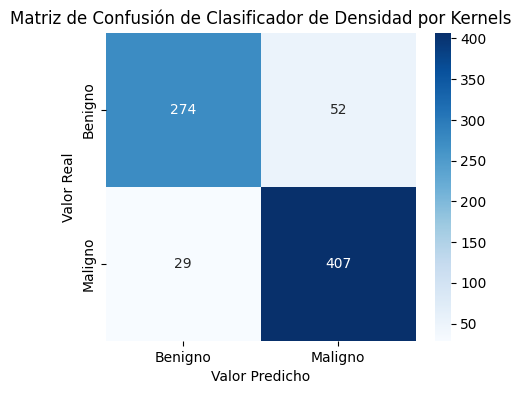

In [233]:
# Calculando la matriz de confusión
conf_matrix = rice_results_kde["confusion_matrix"]

# Graficando la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión de Clasificador de Densidad por Kernels')
plt.show()

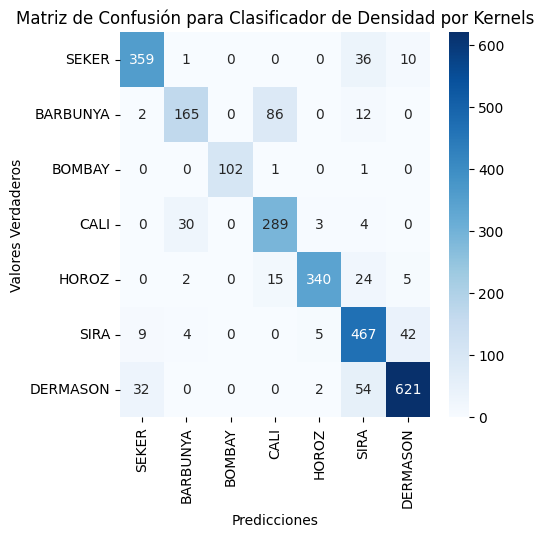

In [254]:
conf_matrix = dry_bean_results_kde["confusion_matrix"]

# Graficando la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
            yticklabels=['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión para Clasificador de Densidad por Kernels')
plt.show()